# NASA Turbofan Jet Engine Data Set
Run to Failure Degradation Simulation (RUL)

## The Assignments to solve for are-:
1. Which metric is more important precision or recall ? Give a reason to your answer (for NASA RUL problem)
2. Solve the NASA-RUL problem using a Regression approach
3. Fine-Tune ResNet model to classify cat and dog
4. Figure out how DarkNet works and how can we inference from it using openCV
5. Solve the SunSpot Activity Problem using time-series analysis model like SARIMA


# 1. Which metric is more important precision or recall ? Give a reason to your answer (for NASA RUL problem)
Since it is an aerospace application, the consequences of failing to identify a system nearing its end of life can be catastrophic. It's essential to note that a very high recall might lead to many false alarms (low precision), which can be costly, cause unnecessary downtime, or result in unwarranted maintenance activities.

Recall might be more critical for the NASA RUL problem due to the high costs of missed true positives (undetected imminent failures).

## Already Given

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score

In [2]:
columns=["id","cycle","op1","op2","op3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8",
         "sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19"
         ,"sensor20","sensor21","sensor22","sensor23"]

In [3]:
train=pd.read_csv("./data/train_FD001.txt",sep=" ",names=columns)   ## to read txt into dataframe
test=pd.read_csv("./data/test_FD001.txt",sep=" ",names=columns)
test_result=pd.read_csv("./data/RUL_FD001.txt",sep=" ",header=None)

In [4]:
train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [5]:
test.head() # to print first 5 records in your dataset

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [6]:
test_result.head()

,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


In [7]:
train.info() # to get info of your dataset ex: null values,datatype..,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   op1       20631 non-null  float64
 3   op2       20631 non-null  float64
 4   op3       20631 non-null  float64
 5   sensor1   20631 non-null  float64
 6   sensor2   20631 non-null  float64
 7   sensor3   20631 non-null  float64
 8   sensor4   20631 non-null  float64
 9   sensor5   20631 non-null  float64
 10  sensor6   20631 non-null  float64
 11  sensor7   20631 non-null  float64
 12  sensor8   20631 non-null  float64
 13  sensor9   20631 non-null  float64
 14  sensor10  20631 non-null  float64
 15  sensor11  20631 non-null  float64
 16  sensor12  20631 non-null  float64
 17  sensor13  20631 non-null  float64
 18  sensor14  20631 non-null  float64
 19  sensor15  20631 non-null  float64
 20  sensor16  20631 non-null  fl

In [8]:
print("Machine ID", train.id.unique())

Machine ID [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


### Engine cycle Lifetime

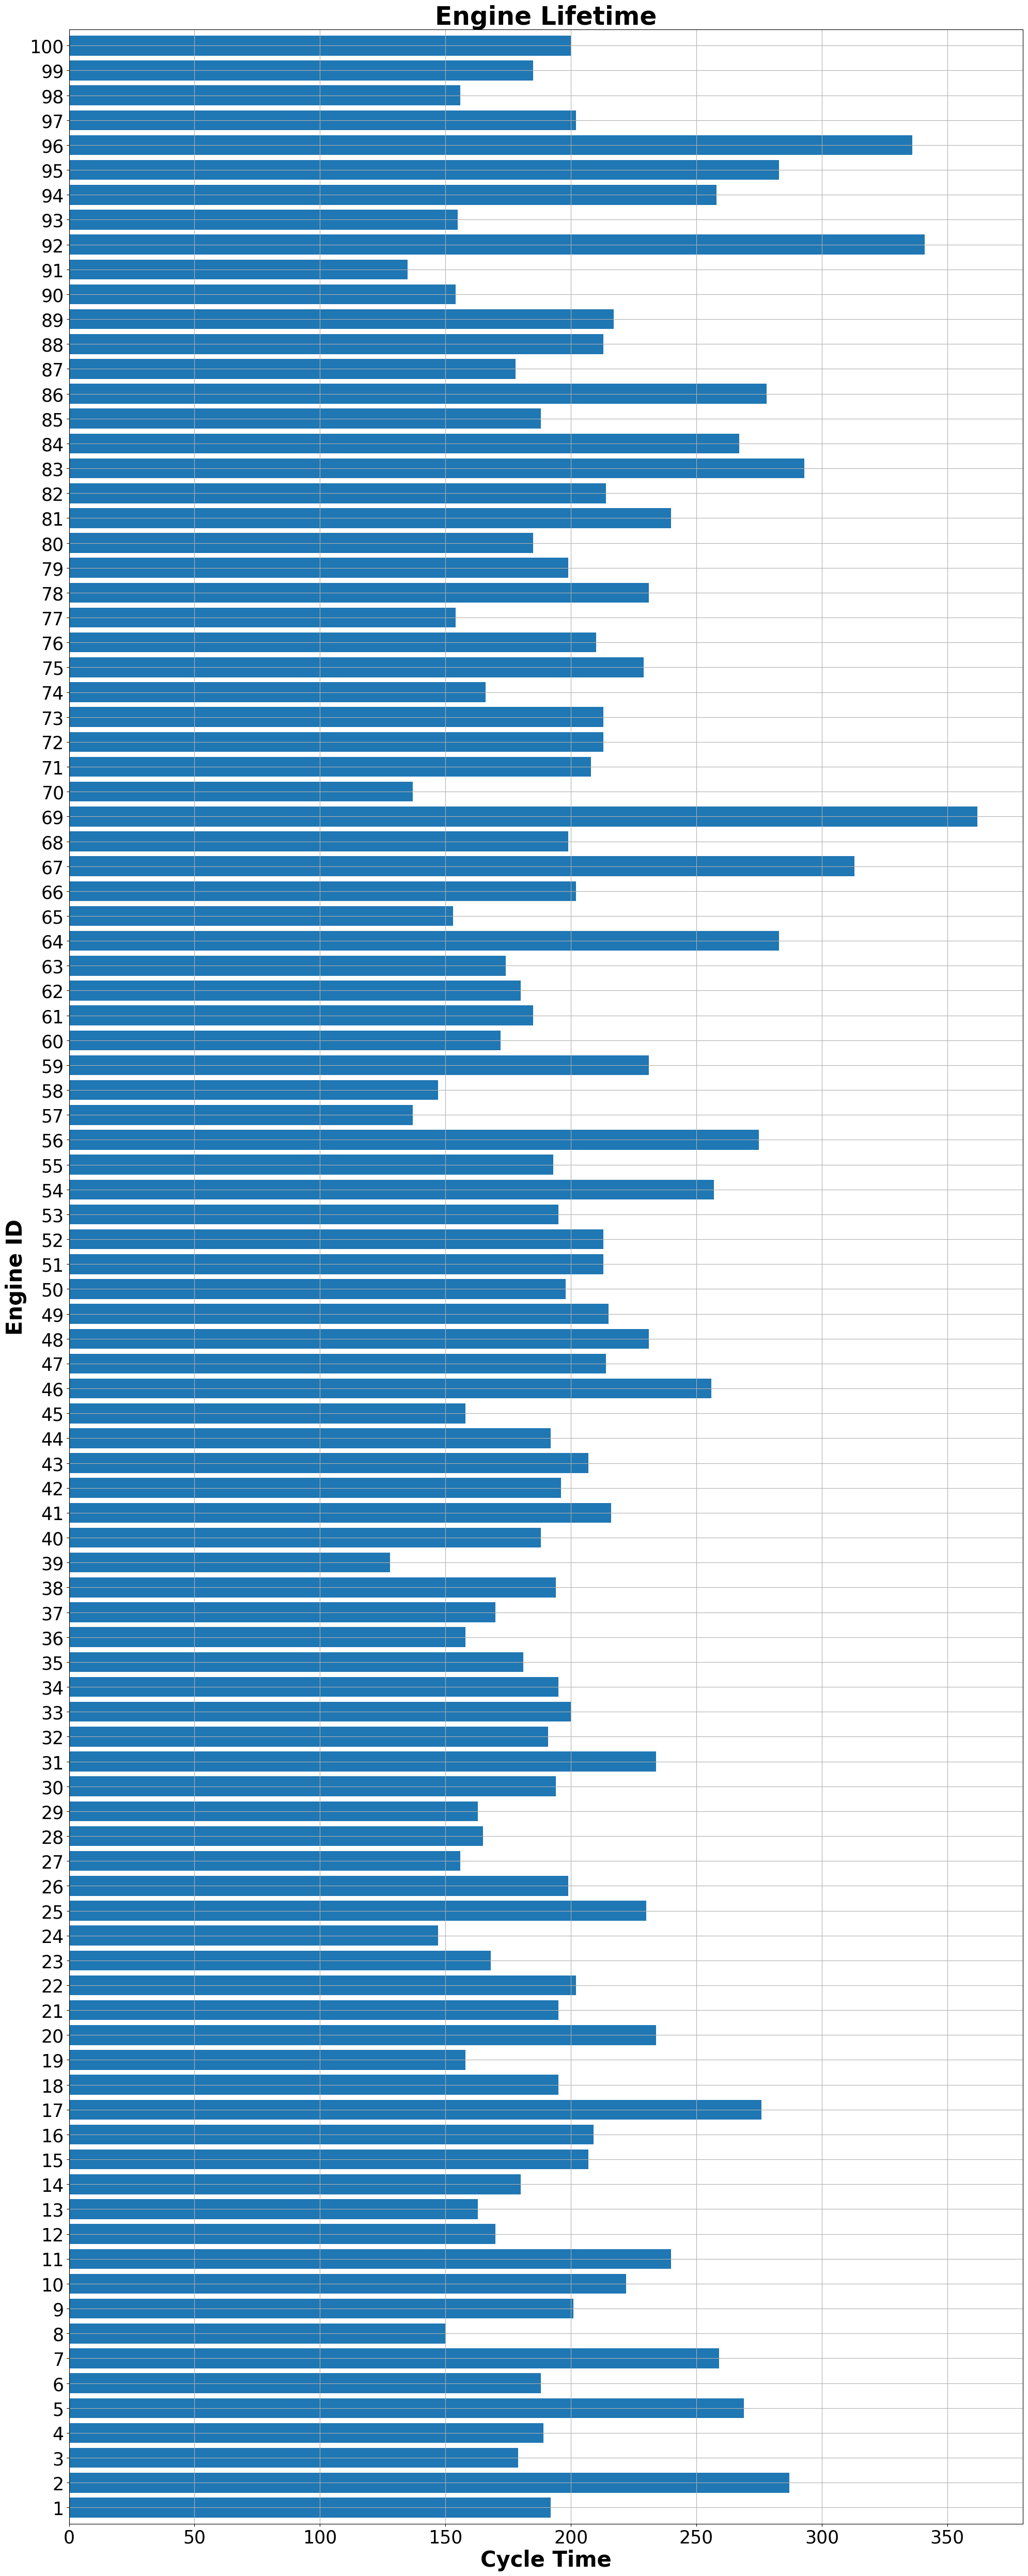

In [9]:
plt.figure(figsize=(20,50))
ax = train.groupby('id')['cycle'].max().plot(kind="barh",width=0.8,stacked=True,align='center',rot=0)
plt.title("Engine Lifetime",fontweight='bold',size=35)
plt.xlabel("Cycle Time",fontweight='bold',size=30)
plt.xticks(size=25)
plt.ylabel('Engine ID',fontweight='bold',size=30)
plt.yticks(size=25)
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
test_result.columns = ["rul","null"]
test_result.head()

,rul,null
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


In [11]:
test_result.drop(["null"],axis = 1,inplace = True)
test_result["id"] = test_result.index+1
test_result.head()

,rul,id
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5


In [12]:
rul = pd.DataFrame(test.groupby('id')['cycle'].max()).reset_index()
rul.columns=['id','max']

In [13]:
rul.head()

,id,max
0,1,31
1,2,49
2,3,126
3,4,106
4,5,98


In [14]:
train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [15]:
test_result['rul_failed']=test_result["rul"]+rul["max"]
test_result.head()

,rul,id,rul_failed
0,112,1,143
1,98,2,147
2,69,3,195
3,82,4,188
4,91,5,189


In [16]:
test_result.drop(['rul'],axis = 1,inplace = True)

In [17]:
test = test.merge(test_result,on=['id'],how='left')

In [18]:
test["remaining_cycle"]=test["rul_failed"]-test["cycle"]
test.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23,rul_failed,remaining_cycle
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN,143,142
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN,143,141
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN,143,140
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN,143,139
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN,143,138


In [19]:
test.isnull().sum()

id                     0
cycle                  0
op1                    0
op2                    0
op3                    0
sensor1                0
sensor2                0
sensor3                0
sensor4                0
sensor5                0
sensor6                0
sensor7                0
sensor8                0
sensor9                0
sensor10               0
sensor11               0
sensor12               0
sensor13               0
sensor14               0
sensor15               0
sensor16               0
sensor17               0
sensor18               0
sensor19               0
sensor20               0
sensor21               0
sensor22           13096
sensor23           13096
rul_failed             0
remaining_cycle        0
dtype: int64

In [20]:
df_train=train.drop(["sensor22","sensor23"],axis=1)
df_test=test.drop(["sensor22","sensor23"],axis=1)

In [21]:
df_train["remaining_cycle"]= df_train.groupby(['id'])['cycle'].transform(max)-df_train['cycle']

In [22]:
df_train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,remaining_cycle
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [23]:
cycle = 30
df_train['label']=df_train["remaining_cycle"].apply(lambda x : 1 if x<=cycle else 0)
df_test['label']=df_test["remaining_cycle"].apply(lambda x : 1 if x<=cycle else 0)

In [24]:
df_train

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,remaining_cycle,label
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4,1
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3,1
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2,1
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1,1


In [25]:
op_set=["op"+str(i) for i in range(1,4)]
sensor=["sensor"+str(i) for i in range(1,22)]

/var/folders/_9/wkm0tqns0n53w3ytpgc_68kc0000gn/T/ipykernel_83826/1529304013.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-dark")
/Users/kushalbanda/miniconda3/envs/KB/lib/python3.11/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/kushalbanda/miniconda3/envs/KB/lib/python3.11/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/kushalbanda/miniconda3/envs/KB/lib/python3.11/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/kushalbanda/

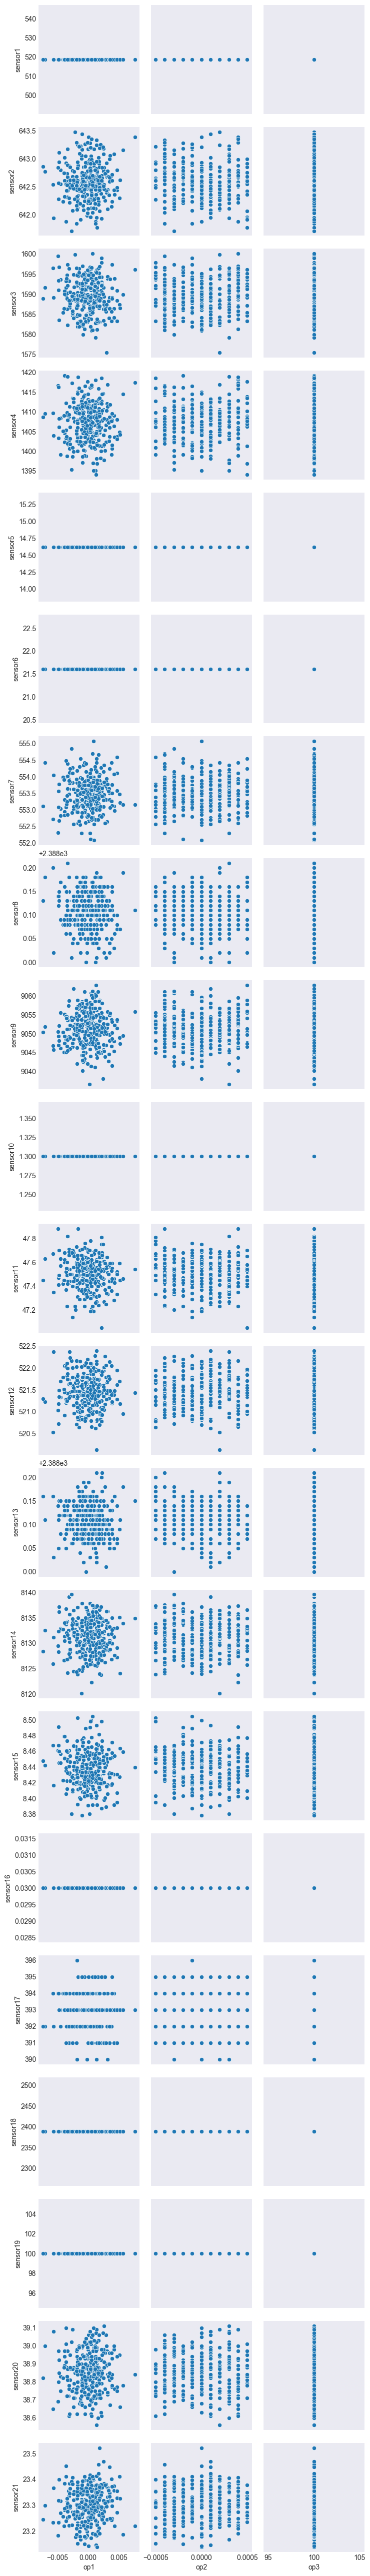

In [26]:
plt.style.use("seaborn-dark")
ax=sns.pairplot(test.query("cycle"),x_vars=op_set,y_vars=sensor,palette="hus1")
plt.show()

In [27]:
df_test.shape

(13096, 29)

In [28]:
df_test.drop(["id","op3","sensor1","sensor5","sensor6","sensor10","sensor16","sensor18","sensor19"],axis=1,inplace=True)

In [29]:
x = df_train.drop(["id","cycle","op3","sensor1","sensor5","sensor6","sensor10","sensor16","sensor18","sensor19","remaining_cycle","label"],axis=1)
y = df_train.label

print('x shape :',x.shape)
print('y shape :',y.shape)

x shape : (20631, 16)
y shape : (20631,)


In [30]:
df_train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,remaining_cycle,label
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,0


In [31]:
x.head(5)

,op1,op2,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


In [32]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

## Model creation

## classification

In [33]:
x=df_train.drop(["id","cycle","op3","sensor1","sensor5","sensor6","sensor10","sensor16","sensor18","sensor19","remaining_cycle","label"],axis=1)
y=df_train.label
print('x shape : ',x.shape)
print('y shape : ',y.shape)

x shape :  (20631, 16)
y shape :  (20631,)


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=3)
print('X_train shape : ',x_train.shape)
print('X_test shape : ',x_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)

X_train shape :  (16504, 16)
X_test shape :  (4127, 16)
y_train shape :  (16504,)
y_test shape :  (4127,)


##  2. Solve the NASA-RUL problem using a Regression approach

In [48]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

class Regression_approachs:
    def __init__(self, x_train, y_train, x_test, y_test, model_type, alpha=1.0, n_jobs = -1, n_estimators = 400):
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test

        self.model_type = model_type
        self.alpha = alpha
        self.n_jobs = -1
        self.n_estimators = n_estimators

        if model_type == 'linear':
            self.model = LinearRegression()
        elif model_type == 'ridge':
            self.model = Ridge(alpha=self.alpha)
        elif model_type == 'lasso':
            self.model = Lasso(alpha=self.alpha)
        elif model_type == 'RandomForestRegressor':
            self.model = RandomForestRegressor(n_jobs = self.n_jobs, n_estimators = self.n_estimators)
        elif model_type == 'GradientBoostingRegressor':
            self.model = GradientBoostingRegressor(n_estimators = self.n_estimators)

        else:
            raise ValueError(f"Invalid model type: {model_type}")

    def fit(self):
        model = self.model.fit(self.x_train, self.y_train)
        score = self.model.score(self.x_test, self.y_test)
        # print(f"{self.model_type} model score: {score}")

        return model

    def Pred(self):
        model = self.fit()
        pred = self.model.predict(self.x_test)
        # pred = list(map(lambda x: 1 if x > 0.5 else 0, pred))
        return pred

    def Scores(self):
        pred = self.Pred()  

        mae = mean_absolute_error(y_test, pred)
        mse = mean_squared_error(y_test, pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, pred)

        print(f"{str.capitalize(self.model_type)} model")
        print(f"MAE:  {mae}")
        print(f"MSE:  {mse}")
        print(f"RMSE: {rmse}")
        print(f"R2_score: {r2}")

        return mae, mse, rmse, r2

        # print("Acc sore: ", accuracy_score(self.y_test, pred))
        # print("Roc Auc Score: ", roc_auc_score(self.y_test, pred))
        # print("precision score: ", precision_score(self.y_test, pred))
        # print("Recall score: ", recall_score(self.y_test, pred))


In [49]:
Linear_Regression = Regression_approachs(x_train, y_train, x_test, y_test, model_type = 'linear')
LR_mae, LR_mse, LR_rmse, LR_r2 = Linear_Regression.Scores()

Linear model
MAE:  0.18676621480478114
MSE:  0.057736042078291645
RMSE: 0.2402832538448979
R2_score: 0.5441001748615003


In [50]:
Lasso = Regression_approachs(x_train, y_train, x_test, y_test, model_type = 'lasso')
Lasso_mae, Lasso_mse, Lasso_rmse, Lasso_r2 = Lasso.Scores()

Lasso model
MAE:  0.19227904485361835
MSE:  0.07870229706030425
RMSE: 0.2805392968200788
R2_score: 0.37854480189105755


In [51]:
Ridge = Regression_approachs(x_train, y_train, x_test, y_test, model_type = 'ridge')
Ridge_mae, Ridge_mse, Ridge_rmse, Ridge_r2 = Ridge.Scores()

Ridge model
MAE:  0.18679081294625421
MSE:  0.0577620822969006
RMSE: 0.24033743423965523
R2_score: 0.5438945540623763


In [52]:
RandomForest_Regressor = Regression_approachs(x_train, y_train, x_test, y_test, model_type = 'RandomForestRegressor')
RandomForest_mae, RandomForest_mse, RandomForest_rmse, RandomForest_r2 = RandomForest_Regressor.Scores()

Randomforestregressor model
MAE:  0.05888296583474679
MSE:  0.02911250605766901
RMSE: 0.17062387305904472
R2_score: 0.7701195658158019


In [53]:
GradientBoosting_Regressor = Regression_approachs(x_train, y_train, x_test, y_test, model_type = 'GradientBoostingRegressor')
GradientBoosting_mae, GradientBoosting_mse, GradientBoosting_rmse, GradientBoosting_r2 = GradientBoosting_Regressor.Scores()

Gradientboostingregressor model
MAE:  0.0646019315041259
MSE:  0.02911174649217741
RMSE: 0.17062164719688241
R2_score: 0.7701255635559021


## Plot 

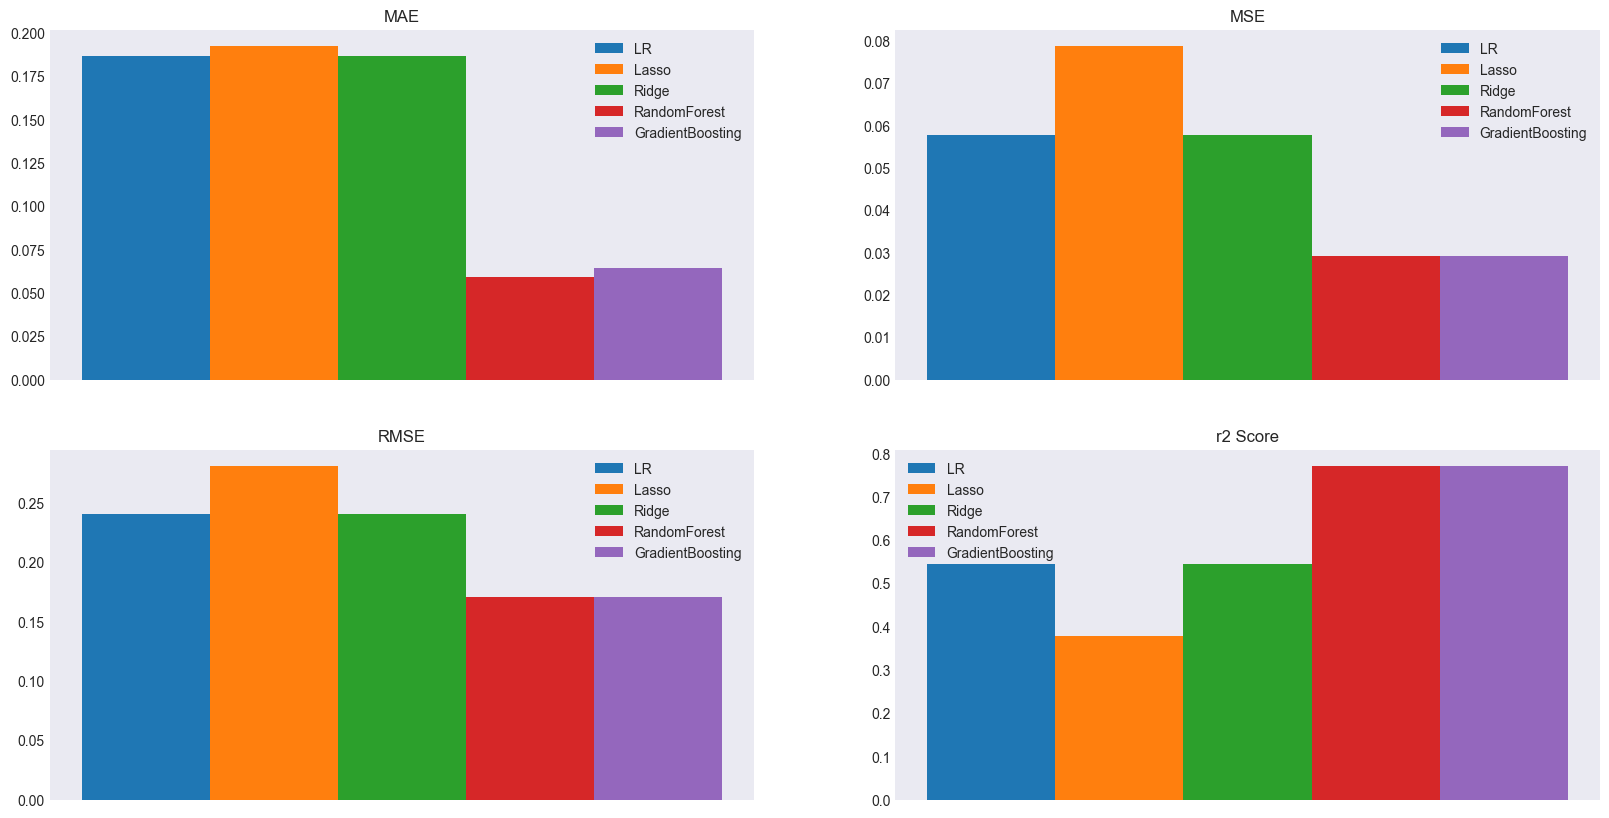

In [82]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

ax_1 = axes[0][0]
width = 0.15 
indices = np.arange(0 , 1)  

ax_1.bar(indices - 2*width, LR_mae, width, label='LR')
ax_1.bar(indices - width, Lasso_mae, width, label='Lasso')
ax_1.bar(indices, Ridge_mae, width, label='Ridge')
ax_1.bar(indices + width, RandomForest_mae, width, label='RandomForest')
ax_1.bar(indices + 2*width, GradientBoosting_mae, width, label='GradientBoosting')
ax_1.set_title('MAE')
ax_1.set_xticks([])
ax_1.legend()


ax_2 = axes[0][1]
ax_2.bar(indices - 2*width, LR_mse, width, label='LR')
ax_2.bar(indices - width, Lasso_mse, width, label='Lasso')
ax_2.bar(indices, Ridge_mse, width, label='Ridge')
ax_2.bar(indices + width, RandomForest_mse, width, label='RandomForest')
ax_2.bar(indices + 2*width, GradientBoosting_mse, width, label='GradientBoosting')
ax_2.set_title('MSE')
ax_2.set_xticks([])
ax_2.legend()

ax_3 = axes[1][0]
ax_3.bar(indices - 2*width, LR_rmse, width, label='LR')
ax_3.bar(indices - width, Lasso_rmse, width, label='Lasso')
ax_3.bar(indices, Ridge_rmse, width, label='Ridge')
ax_3.bar(indices + width, RandomForest_rmse, width, label='RandomForest')
ax_3.bar(indices + 2*width, GradientBoosting_rmse, width, label='GradientBoosting')
ax_3.set_title('RMSE')
ax_3.set_xticks([])
ax_3.legend()

ax_4 = axes[1][1]
ax_4.bar(indices - 2*width, LR_r2, width, label='LR')
ax_4.bar(indices - width, Lasso_r2, width, label='Lasso')
ax_4.bar(indices, Ridge_r2, width, label='Ridge')
ax_4.bar(indices + width, RandomForest_r2, width, label='RandomForest')
ax_4.bar(indices + 2*width, GradientBoosting_r2, width, label='GradientBoosting')
ax_4.set_xticks([])
ax_4.set_title('r2 Score')
ax_4.legend()


plt.show()
